#CNN-CIFAR10-KERAS-TF2.X

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.5.0
Python 3.7.11


In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
(X_train_, y_train), (X_test_, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
print('X_train shape:', X_train_.shape)
print('train samples: ',X_train_.shape[0])
print('test samples: ', X_test_.shape[0])

X_train shape: (50000, 32, 32, 3)
train samples:  50000
test samples:  10000


In [5]:
num_train, img_rows, img_cols, img_channels =  X_train_.shape

In [6]:
# image dimension:
input_shape = (img_rows, img_cols, 3)

In [7]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [8]:
n_classes = len(np.unique(y_train))
n_classes

10

In [9]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Visualizing the classes with an image example

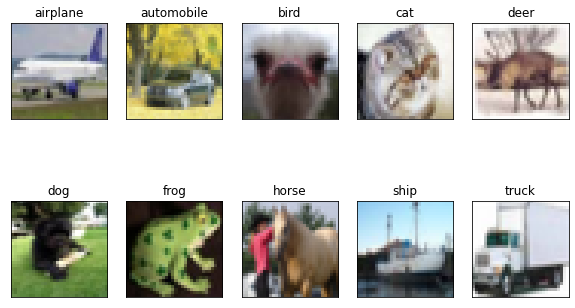

In [10]:
fig = plt.figure(figsize=(10,6))
for i in range(n_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train_[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    image = features_idx[img_num,::].reshape((32, 32, 3))
    ax.set_title(class_names[i])
    plt.imshow(image)
plt.show()

In [11]:
#Normalize the input data
X_train = X_train_.astype('float32')/255.
X_test = X_test_.astype('float32')/255.

In [12]:
#One-hot encode the labels
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

## CNN architecture

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.3))

In [15]:
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.3))

In [16]:
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.5))

In [17]:
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = n_classes, activation = 'softmax'))

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

## Compiling the model:

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
# Define a callback to prevent overfitting:
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]
#monitor: quantity to be monitored
#patience: number of epochs with no improvement after which training will be stopped.

In [21]:
#hyperparameters
batch_size = 128
n_epochs = 20

In [22]:
results = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs,
          verbose=1, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/20
391/391 [==============================] - 44s 36ms/step - loss: 1.8468 - accuracy: 0.3763 - val_loss: 3.0123 - val_accuracy: 0.2072
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 1.2313 - accuracy: 0.5550 - val_loss: 1.3501 - val_accuracy: 0.5477
Epoch 3/20
391/391 [==============================] - 14s 35ms/step - loss: 1.0320 - accuracy: 0.6323 - val_loss: 0.8519 - val_accuracy: 0.6990
Epoch 4/20
391/391 [==============================] - 13s 34ms/step - loss: 0.9050 - accuracy: 0.6799 - val_loss: 0.8366 - val_accuracy: 0.7036
Epoch 5/20
391/391 [==============================] - 13s 34ms/step - loss: 0.8257 - accuracy: 0.7105 - val_loss: 0.8922 - val_accuracy: 0.6881
Epoch 6/20
391/391 [==============================] - 14s 36ms/step - loss: 0.7700 - accuracy: 0.7306 - val_loss: 0.7232 - val_accuracy: 0.7431
Epoch 7/20
391/391 [==============================] - 13s 34ms/step - loss: 0.7154 - accuracy: 0.7507 - val_loss: 0.7492 - val_accuracy:

## Saving the model:

In [ ]:
model.save_weights('../data/cifar10_weights.h5', overwrite=True)

In [ ]:
model.save('../data/cifar10.h5')

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model('../data/cifar10.h5')

## References:

https://www.cs.toronto.edu/~kriz/cifar.html

http://pillow.readthedocs.io/en/3.0.x/reference/Image.html?highlight=from%20array#PIL.Image.fromarray

https://keras.io/callbacks/